In [133]:
import matplotlib.pyplot as plt
import numpy as np

from neuropacks import Allen
from scipy.stats import spearmanr

%matplotlib inline

In [2]:
experiment_id = 511510688

In [3]:
allen = Allen(manifest_file=None)

In [4]:
ophys_id = allen.get_ophys_experiment_id(
    experiment_id=experiment_id,
    stimulus_name='static_gratings'
)

In [5]:
angles = allen.get_design_matrix(
    experiment_id=experiment_id,
    stimulus_name='static_gratings',
    stimulus_key='orientation',
    design='values'
)

X = allen.get_design_matrix(
    experiment_id=experiment_id,
    stimulus_name='static_gratings',
    stimulus_key='orientation',
    design='one-hot'
)

In [81]:
unique_angles = np.unique(angles)
n_unique_angles = unique_angles.size

In [7]:
Y = allen.get_response_matrix(
    experiment_id=experiment_id,
    stimulus_name='static_gratings'
)

In [19]:
cell_ids = allen.get_cell_specimen_ids(ophys_id)
n_cells = cell_ids.size

In [27]:
tuning_curves = np.zeros((n_cells, unique_angles.size))
preferred_tunings = np.zeros(n_cells)
modulations = np.zeros(n_cells)

for neuron in range(n_cells):
    tuning_curve = np.array([np.mean(Y[angles == unique_angles[idx], neuron])
                            for idx in range(unique_angles.size)])
    tuning_curves[neuron] = tuning_curve
    preferred_tunings[neuron] = unique_angles[np.argmax(tuning_curve)]
    modulations[neuron] = np.max(tuning_curve) - np.min(tuning_curve)

In [42]:
sorted_modulation_idx = np.argsort(-modulations)

neurons_by_tuning = {}
for angle in unique_angles:
    neurons_for_angle = np.argwhere(preferred_tunings == angle).ravel()
    neurons_by_tuning[angle] = \
        neurons_for_angle[np.argsort(-modulations[neurons_for_angle])]

In [44]:
[neurons_by_tuning[angle].size for angle in unique_angles]

[18, 21, 36, 23, 19, 20]

# Plot Tuning Curves

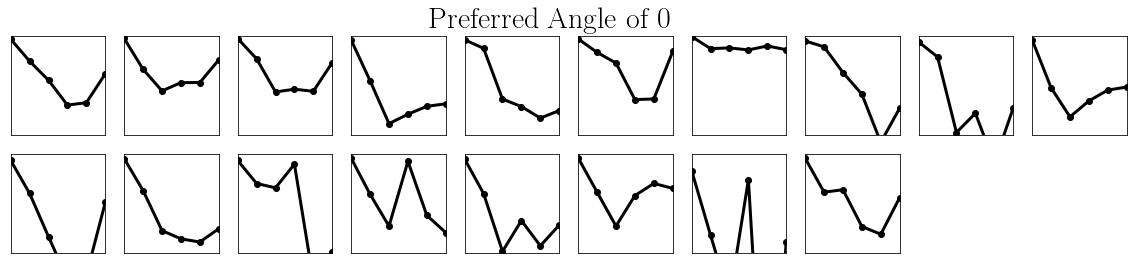

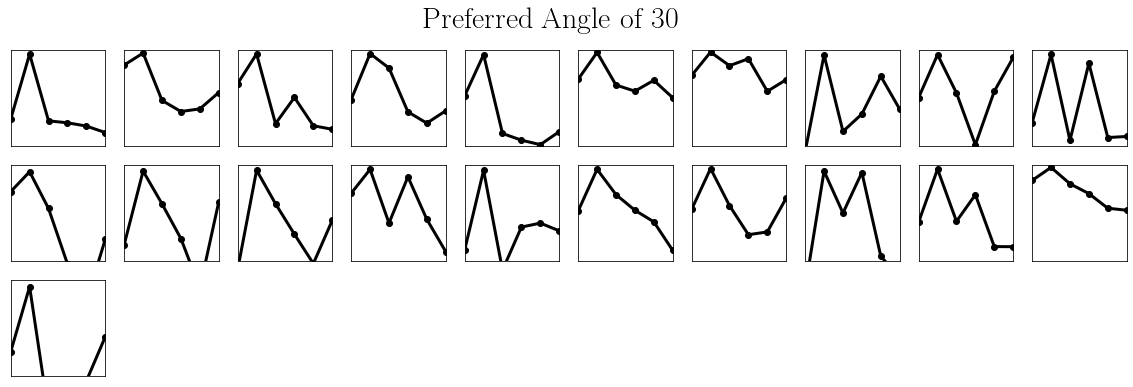

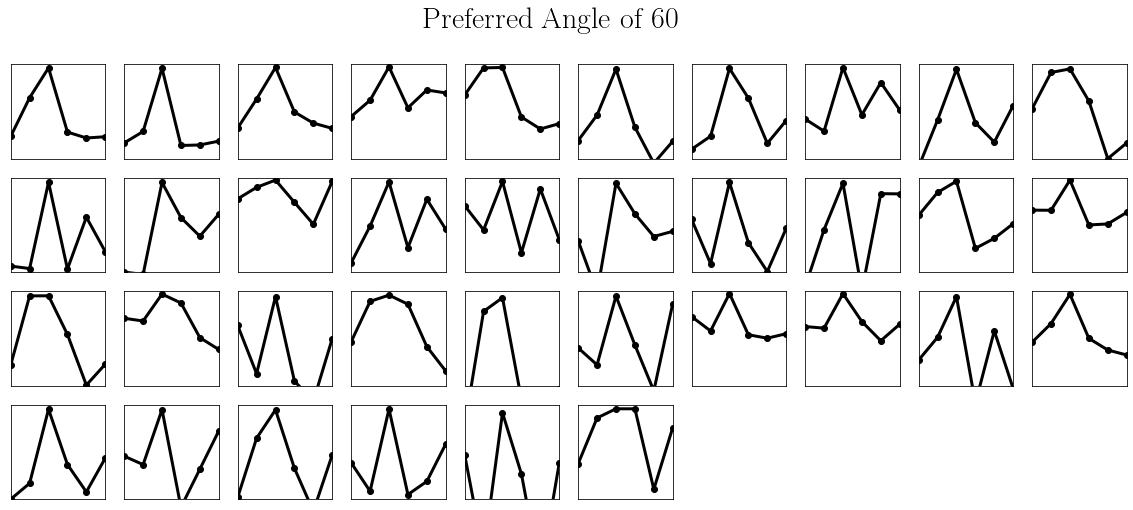

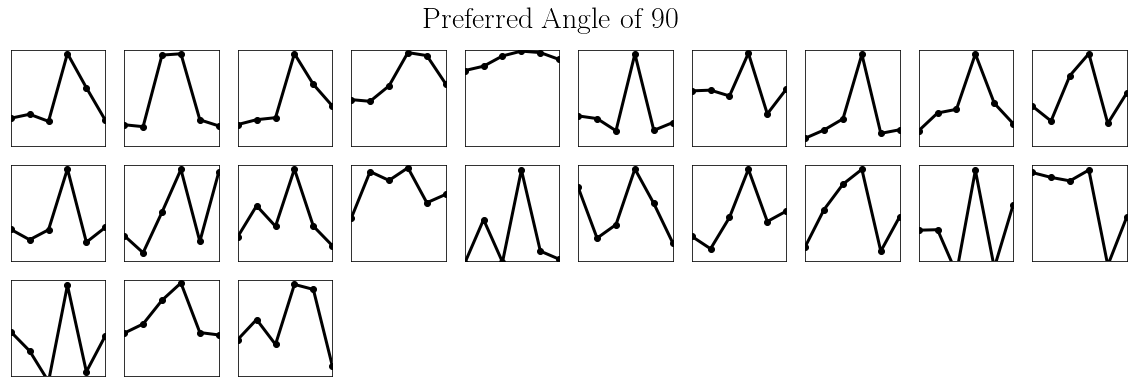

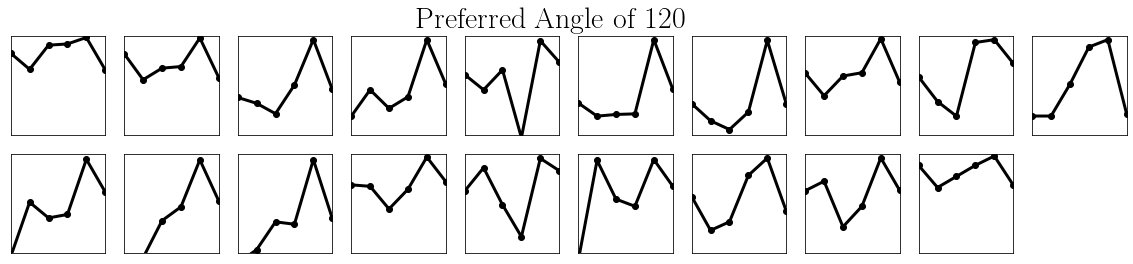

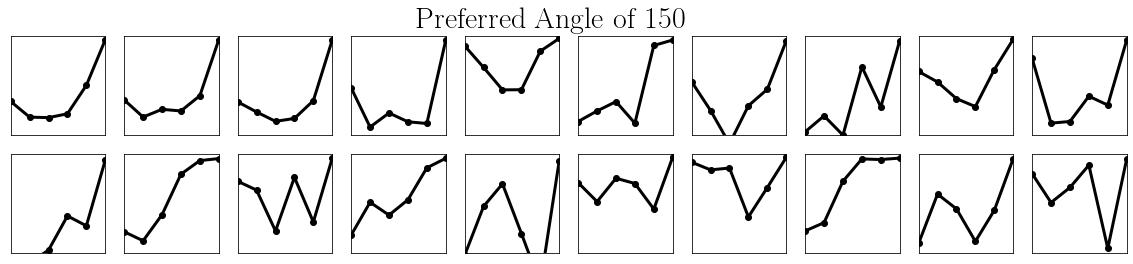

In [55]:
for angle in unique_angles:
    neurons_for_angle = neurons_by_tuning[angle]
    n_neurons_for_angle = neurons_for_angle.size
    
    n_cols = 10
    n_rows = np.ceil(n_neurons_for_angle / n_cols).astype('int')
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))
    
    for idx, ax in enumerate(axes.ravel()):
        if idx < n_neurons_for_angle:
            neuron_idx = neurons_for_angle[idx]
            tuning_curve = tuning_curves[neuron_idx]
            ax.plot(unique_angles, tuning_curve / np.max(tuning_curve),
                    marker='o', color='k', linewidth=3)
            ax.set_ylim(bottom=0)
            ax.set_xlim([0, 150])
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')
    
    fig.suptitle('Preferred Angle of ' + str(int(angle)), fontsize=30)
    plt.savefig('allen_tuning_curves_' + str(int(angle)) + '.pdf', bbox_inches='tight')
    

# Plot Neuron-Neuron Responses

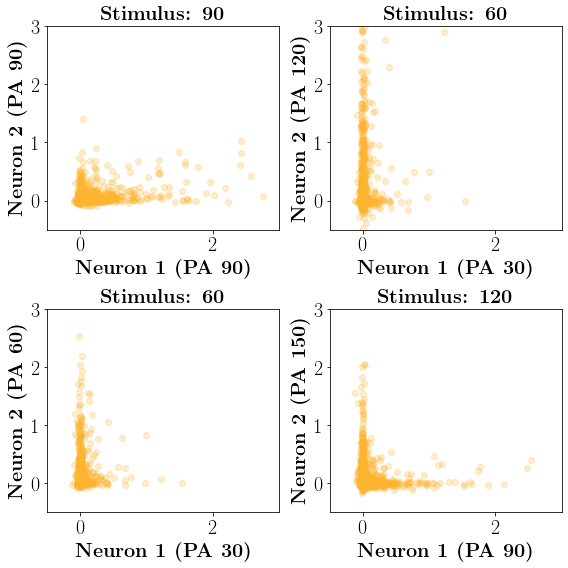

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# similar neurons
neuron1 = neurons_by_tuning[90][0]
neuron2 = neurons_by_tuning[90][1]

angle_idx = np.argwhere(angles == 90).ravel()
axes[0, 0].scatter(
    Y[angle_idx, neuron1], Y[angle_idx, neuron2],
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[0, 0].set_xlim([-0.5, 3])
axes[0, 0].set_ylim([-0.5, 3])
axes[0, 0].set_xlabel(r'\textbf{Neuron 1 (PA 90)}', fontsize=20)
axes[0, 0].set_ylabel(r'\textbf{Neuron 2 (PA 90)}', fontsize=20)
axes[0, 0].set_title(r'\textbf{Stimulus: 90}', fontsize=20)

# different neurons
neuron1 = neurons_by_tuning[30][0]
neuron2 = neurons_by_tuning[120][0]

angle_idx = np.argwhere(angles == 60).ravel()
axes[0, 1].scatter(
    Y[angle_idx, neuron1], Y[angle_idx, neuron2],
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[0, 1].set_xlim([-0.5, 3])
axes[0, 1].set_ylim([-0.5, 3])
axes[0, 1].set_xlabel(r'\textbf{Neuron 1 (PA 30)}', fontsize=20)
axes[0, 1].set_ylabel(r'\textbf{Neuron 2 (PA 120)}', fontsize=20)
axes[0, 1].set_title(r'\textbf{Stimulus: 60}', fontsize=20)

# different neurons
neuron1 = neurons_by_tuning[30][0]
neuron2 = neurons_by_tuning[60][0]

angle_idx = np.argwhere(angles == 60).ravel()
axes[1, 0].scatter(
    Y[angle_idx, neuron1], Y[angle_idx, neuron2],
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[1, 0].set_xlim([-0.5, 3])
axes[1, 0].set_ylim([-0.5, 3])
axes[1, 0].set_xlabel(r'\textbf{Neuron 1 (PA 30)}', fontsize=20)
axes[1, 0].set_ylabel(r'\textbf{Neuron 2 (PA 60)}', fontsize=20)
axes[1, 0].set_title(r'\textbf{Stimulus: 60}', fontsize=20)

# different neurons
neuron1 = neurons_by_tuning[90][0]
neuron2 = neurons_by_tuning[150][0]

angle_idx = np.argwhere(angles == 120).ravel()
axes[1, 1].scatter(
    Y[angle_idx, neuron1], Y[angle_idx, neuron2],
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[1, 1].set_xlim([-0.5, 3])
axes[1, 1].set_ylim([-0.5, 3])
axes[1, 1].set_xlabel(r'\textbf{Neuron 1 (PA 90)}', fontsize=20)
axes[1, 1].set_ylabel(r'\textbf{Neuron 2 (PA 150)}', fontsize=20)
axes[1, 1].set_title(r'\textbf{Stimulus: 120}', fontsize=20)

plt.tight_layout()

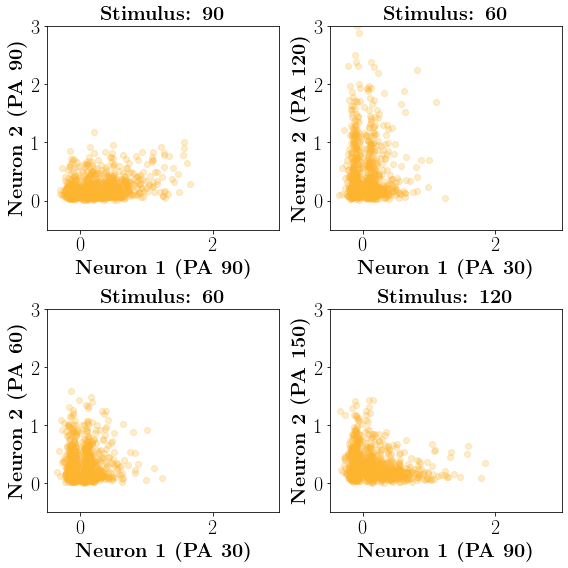

In [177]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# similar neurons
neuron1 = neurons_by_tuning[90][0]
neuron2 = neurons_by_tuning[90][1]

angle_idx = np.argwhere(angles == 90).ravel()
axes[0, 0].scatter(
    np.sign(Y[angle_idx, neuron1]) * np.sqrt(np.abs(Y[angle_idx, neuron1])), np.sign(np.abs(Y[angle_idx, neuron2])) * np.sqrt(np.abs(Y[angle_idx, neuron2])),
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[0, 0].set_xlim([-0.5, 3])
axes[0, 0].set_ylim([-0.5, 3])
axes[0, 0].set_xlabel(r'\textbf{Neuron 1 (PA 90)}', fontsize=20)
axes[0, 0].set_ylabel(r'\textbf{Neuron 2 (PA 90)}', fontsize=20)
axes[0, 0].set_title(r'\textbf{Stimulus: 90}', fontsize=20)

# different neurons
neuron1 = neurons_by_tuning[30][0]
neuron2 = neurons_by_tuning[120][0]

angle_idx = np.argwhere(angles == 60).ravel()
axes[0, 1].scatter(
    np.sign(Y[angle_idx, neuron1]) * np.sqrt(np.abs(Y[angle_idx, neuron1])), np.sign(np.abs(Y[angle_idx, neuron2])) * np.sqrt(np.abs(Y[angle_idx, neuron2])),
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[0, 1].set_xlim([-0.5, 3])
axes[0, 1].set_ylim([-0.5, 3])
axes[0, 1].set_xlabel(r'\textbf{Neuron 1 (PA 30)}', fontsize=20)
axes[0, 1].set_ylabel(r'\textbf{Neuron 2 (PA 120)}', fontsize=20)
axes[0, 1].set_title(r'\textbf{Stimulus: 60}', fontsize=20)

# different neurons
neuron1 = neurons_by_tuning[30][0]
neuron2 = neurons_by_tuning[60][0]

angle_idx = np.argwhere(angles == 60).ravel()
axes[1, 0].scatter(
    np.sign(Y[angle_idx, neuron1]) * np.sqrt(np.abs(Y[angle_idx, neuron1])), np.sign(np.abs(Y[angle_idx, neuron2])) * np.sqrt(np.abs(Y[angle_idx, neuron2])),
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[1, 0].set_xlim([-0.5, 3])
axes[1, 0].set_ylim([-0.5, 3])
axes[1, 0].set_xlabel(r'\textbf{Neuron 1 (PA 30)}', fontsize=20)
axes[1, 0].set_ylabel(r'\textbf{Neuron 2 (PA 60)}', fontsize=20)
axes[1, 0].set_title(r'\textbf{Stimulus: 60}', fontsize=20)

# different neurons
neuron1 = neurons_by_tuning[90][0]
neuron2 = neurons_by_tuning[150][0]

angle_idx = np.argwhere(angles == 120).ravel()
axes[1, 1].scatter(
    np.sign(Y[angle_idx, neuron1]) * np.sqrt(np.abs(Y[angle_idx, neuron1])), np.sign(np.abs(Y[angle_idx, neuron2])) * np.sqrt(np.abs(Y[angle_idx, neuron2])),
    color=plt.get_cmap('plasma')(idx / n_unique_angles), alpha=0.25)
axes[1, 1].set_xlim([-0.5, 3])
axes[1, 1].set_ylim([-0.5, 3])
axes[1, 1].set_xlabel(r'\textbf{Neuron 1 (PA 90)}', fontsize=20)
axes[1, 1].set_ylabel(r'\textbf{Neuron 2 (PA 150)}', fontsize=20)
axes[1, 1].set_title(r'\textbf{Stimulus: 120}', fontsize=20)

plt.tight_layout()